<a href="https://colab.research.google.com/github/AimanAminuddin/DSA4212-Projects/blob/main/Reccomendation%20Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install relevant packages**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/DSA4212/ml-1m.zip

Archive:  /content/drive/MyDrive/DSA4212/ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


**Load the Data**

In [ ]:
# Make display smaller
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/content/ml-1m/users.dat', sep='::',
 header=None, names=unames, engine='python',encoding = 'latin-1')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/content/ml-1m/ratings.dat', sep='::',
 header=None, names=rnames, engine='python',encoding = 'latin-1')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/content/ml-1m/movies.dat', sep='::',
                       header=None, names=mnames, engine='python',encoding = 'latin-1')

**Verify that users is loaded**

In [ ]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.dtypes


user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

In [ ]:
len(users)
print("There are " + str(len(users)) + " users")

There are 6040 users


**Verify that ratings loaded properly**

In [ ]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [ ]:
print(ratings['rating'].unique()) # there are 5 ratings 

[5 3 4 2 1]


**Verify that movies are loaded**

In [ ]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("There are " + str(len(movies))+" movies")

There are 3883 movies


**Collaborative Filtering With SVD (user ratings)**

In [ ]:
data =pd.merge(ratings, users)

In [ ]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


**Exploratory Data Analysis**

In [ ]:
data.drop("gender", axis=1, inplace=True)
data.drop("age", axis=1, inplace=True)
data.drop("occupation", axis=1, inplace=True)
data.drop("zip", axis=1, inplace=True)

In [ ]:
data

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
data.describe()

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
data.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [ ]:
users = data['user_id'].unique() #list of all users
movies = data['movie_id'].unique() #list of all movies
print("Number of users", len(users))
print("Number of movies", len(movies))
print(data.head())

Number of users 6040
Number of movies 3706
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [ ]:
import numpy as np
import scipy

In [ ]:
np.random.seed(4212)

**Sort the data to keep the more recent ratings towards the bottom and take 20% of ratings from every user starting from the bottom as the test set**

---

Based on historical ratings, we want to determine how accurate  our model is to predict future ratings of movies they watch 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test = train_test_split(data, test_size=0.1, random_state=42)

In [ ]:
X_train

,user_id,movie_id,rating,timestamp
647085,3894,2750,1,965791718
130254,843,2791,4,975358667
232200,1408,2006,2,974762606
61200,412,3301,3,976651610
477192,2929,832,4,971642889
...,...,...,...,...
259178,1586,1077,5,974735719
365838,2129,2700,5,974643199
131932,854,3102,3,975355597
671155,4033,3479,5,965525805


In [ ]:
X_test

,user_id,movie_id,rating,timestamp
895536,5412,2683,2,960243649
899739,5440,904,5,959995181
55687,368,3717,4,976311423
63727,425,1721,4,976283587
822011,4942,3697,1,962642480
...,...,...,...,...
212290,1293,3421,4,974788653
760423,4517,2747,3,974438652
298611,1772,2858,5,974856106
219489,1331,1178,5,974953051


In [ ]:
X_train.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [ ]:
X_train.describe()

,user_id,movie_id,rating,timestamp
count,900188.000000,900188.000000,900188.000000,9.001880e+05
mean,3024.535500,1865.345260,3.581445,9.722410e+08
std,1727.768385,1095.830896,1.117171,1.214638e+07
min,1.000000,1.000000,1.000000,9.567039e+08
25%,1509.000000,1030.000000,3.000000,9.653030e+08
50%,3069.000000,1834.000000,4.000000,9.729902e+08
75%,4476.000000,2770.000000,4.000000,9.752202e+08
max,6040.000000,3952.000000,5.000000,1.046455e+09


**Convert attributes to int type**

In [ ]:
X_train['user_id'] = X_train['user_id'].astype(int)
X_train['movie_id'] = X_train['movie_id'].astype(int)
X_train['rating'] = X_train['rating'].astype(int)
X_train['timestamp'] = X_train['timestamp'].astype(int)

In [ ]:
X_train.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

**Building Utility Matrix**

---
Observe that the matrix is sparse 


In [ ]:
ratings_matrix = X_train.pivot_table(index='user_id', columns='movie_id', values='rating')

In [ ]:
ratings_matrix 

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_test['user_id'] = X_test['user_id'].astype(int)
X_test['movie_id'] = X_test['movie_id'].astype(int)
X_test['rating'] = X_test['rating'].astype(int)
X_test['timestamp'] = X_test['timestamp'].astype(int)

In [ ]:
test_matrix = X_test.pivot_table(index='user_id', columns='movie_id', values='rating')

In [ ]:
test_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Replace NaN values with 0**

In [ ]:
training = ratings_matrix.copy()
training = np.nan_to_num(training)
training 

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

**Matrix Factorization With SGD**

---
The loss function is $L(p_{u},q_{i},r_{ui}) = \frac{1}{N}\sum_{u,i\in R}(r_{ui}-\langle p_{u},q_{i}\rangle)^{2})$. 


In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
import pylab as plt 

In [ ]:
training 

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_lst = []
y_lst = []
for x,y in zip(*training.nonzero()):
  x_lst.append(x)
  y_lst.append(y)

In [ ]:
def sigma(x):
  return 4/(1+jnp.exp(-x)) + 1 

In [ ]:
@jax.jit
def MSE(A,U,V):
  
  error = (A-jax.tree_map(lambda x:sigma(x),U@V.T))[x_lst,y_lst]
  return jnp.mean(error ** 2)

In [ ]:
MSE_grad_U = jax.grad(MSE,argnums = 1)
MSE_grad_V = jax.grad(MSE,argnums = 2)

**Calculating Test Error**

In [ ]:
test = np.nan_to_num(test_matrix)

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

def mse(W,test_data):
  x = W[test_data.nonzero()].flatten()
  y = test_data[test_data.nonzero()].flatten() 
  return mean_squared_error(x,y)

def rmse(W,test_data):
  return sqrt(mse(W,test_data))

In [ ]:
m,n = training.shape 
k = 20 
P = np.random.normal(0,1,size = (m,k))
Q = np.random.normal(0,1,size = (n,k))

In [ ]:
P

array([[ 1.95279638, -0.97029629, -1.1252923 , ..., -0.54843563,
         0.62458739, -0.33015631],
       [-0.74276025, -0.4563032 ,  0.66622677, ..., -0.40956893,
         0.99646271, -0.63523451],
       [ 2.86997555,  1.15544049,  0.03978806, ...,  0.28358357,
         0.23517698,  1.04354456],
       ...,
       [ 1.50247781, -0.37517575,  0.99278977, ...,  0.20909724,
        -0.0779329 , -0.63791812],
       [ 0.34166928, -1.16204142, -0.07845872, ...,  0.78962168,
         0.84184247,  0.13194481],
       [ 1.01077592,  0.26366354,  1.64153834, ...,  0.03933355,
        -1.39812289, -1.89069853]])

In [ ]:
Q

array([[ 0.18993879, -0.20552493, -0.20635329, ...,  1.2849978 ,
         0.15155087,  1.14919463],
       [ 0.55050374, -0.02986741,  0.25426682, ...,  0.61823232,
         0.34668623,  1.37206334],
       [-1.74119695, -0.63992195,  2.13411933, ...,  1.6046557 ,
        -1.57758823, -0.79019125],
       ...,
       [ 1.52875873,  0.19849024,  1.49183487, ...,  0.30072341,
         0.74254906, -0.76309749],
       [ 0.19493105, -0.62694019, -0.22501979, ..., -2.89354663,
         2.19524398, -0.60113154],
       [-0.80738134, -0.30494771,  0.23250126, ...,  0.29077089,
        -0.16303225, -1.17722092]])

In [ ]:
def seq_fast_matrix_factorization(R,P,Q,k,iterations = 200,learning_rate = 700):
  loss_history = []

  for i in range(iterations):
    grad_P = MSE_grad_U(R,P,Q)
    P -= learning_rate * grad_P 
    grad_Q = MSE_grad_V(R,P,Q)
    Q -= learning_rate * grad_Q 
    value = MSE(R,P,Q)
    loss_history.append(value)

    if (i + 1) % 20 == 0:
      print("Loss is " + str(value))
    else:
      pass

  return P,Q,loss_history  

In [ ]:
A,B,loss_seq_history = seq_fast_matrix_factorization(training,P,Q,20)

Loss is 1.5028228
Loss is 1.0088959
Loss is 0.8602976
Loss is 0.78953946
Loss is 0.7471414
Loss is 0.7174139
Loss is 0.69426686
Loss is 0.6749371
Loss is 0.65826476
Loss is 0.64383173


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

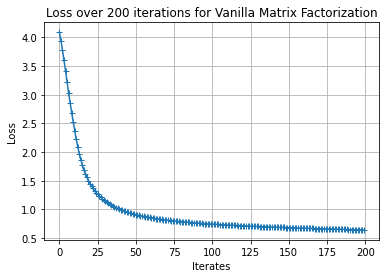

In [ ]:
from google.colab import files
plt.plot(loss_seq_history,"-+")
plt.title("Loss over 200 iterations for Vanilla Matrix Factorization")
plt.xlabel("Iterates")
plt.ylabel("Loss")
plt.grid(True) 
plt.savefig("Vanilla Matrix Factorization.jpg",bbox_inches='tight')
files.download("Vanilla Matrix Factorization.jpg") 

In [ ]:
prediction  = jax.tree_map(lambda x:sigma(x),A@B.T)

In [ ]:
prediction

DeviceArray([[4.497511 , 2.5727983, 3.92003  , ..., 4.1618967, 4.9838963,
              2.3654256],
             [4.0808096, 3.2356212, 3.078822 , ..., 2.6071916, 4.948125 ,
              3.8957205],
             [4.090522 , 3.8055122, 3.1905973, ..., 1.4074919, 1.0031445,
              4.0714035],
             ...,
             [4.638654 , 2.157579 , 2.432385 , ..., 4.9818535, 4.999939 ,
              3.7727962],
             [4.155615 , 2.668036 , 2.8208332, ..., 2.383294 , 4.905882 ,
              2.8544016],
             [3.4821517, 2.0241413, 2.0860362, ..., 1.3926933, 1.116693 ,
              3.6447895]], dtype=float32)

In [ ]:
training_MSE = loss_seq_history[-1]

In [ ]:
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 0.64383173
User Based CF Train RMSE 0.80239123


In [ ]:
print("User Based CF MSE " + str(mse(prediction,test))) # for k = 20
print("User Based CF RMSE " + str(rmse(prediction,test))) # for k = 20

# On average each predicted rating off by 0.9

User Based CF MSE 2.8759070099901693
User Based CF RMSE 1.6958499373441536


**Training and Test RMSE are off by about 0.7323. Possible indication of overfitting?**

**Matrix Factorization With Regularization**

In [ ]:
training.shape 

(6040, 3694)

In [ ]:
@jax.jit 
def regularized_loss(A,U,V,l):
  # l is the regularization term 
  m,n = A.shape 
  return MSE(A,U,V) + l/m * (U**2)[x_lst,y_lst].sum()+ l/n *(V**2)[x_lst,y_lst].sum()

In [ ]:
reg_grad_U = jax.jit(jax.grad(regularized_loss,argnums = 1))
reg_grad_V = jax.jit(jax.grad(regularized_loss,argnums = 2))

In [ ]:
def regularized_matrix_factorization(R,P,Q,k,l,iterations = 200,learning_rate = 700):
  loss_history = []

  for i in range(iterations):
    grad_P = reg_grad_U(R,P,Q,l)
    P -= learning_rate * grad_P 
    grad_Q = reg_grad_V(R,P,Q,l)
    Q -= learning_rate * grad_Q 
    value = regularized_loss(R,P,Q,l)
    loss_history.append(value)

    if (i + 1) % 20 == 0:
      print("Regularized Loss is " + str(value))
    else:
      pass

  return P,Q,loss_history  

In [ ]:
A,B,reg_history_1 = regularized_matrix_factorization(training,P,Q,20,1.)

Regularized Loss is 199.39165
Regularized Loss is 163.32945
Regularized Loss is 163.56918
Regularized Loss is 160.29507
Regularized Loss is 157.09377
Regularized Loss is 154.73293
Regularized Loss is 153.29955
Regularized Loss is 152.43234
Regularized Loss is 151.79987
Regularized Loss is 151.54648


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

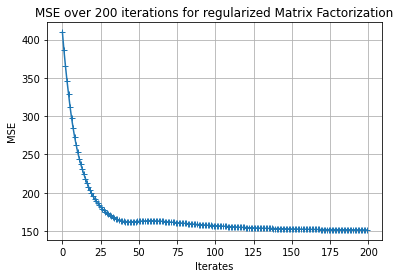

In [ ]:
from google.colab import files
plt.plot(reg_history_1,"-+")
plt.title("MSE over 200 iterations for regularized Matrix Factorization")
plt.xlabel("Iterates")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("Regularized Matrix Factorization.jpg",bbox_inches='tight')
files.download("Regularized Matrix Factorization.jpg") 

In [ ]:
prediction1 = jax.tree_map(lambda x: sigma(x),A@B.T)

In [ ]:
prediction1

DeviceArray([[4.557869 , 3.0062542, 2.7636933, ..., 1.4072943, 4.7394905,
              2.4838386],
             [3.9442952, 3.3052814, 4.87239  , ..., 1.7819574, 4.984373 ,
              4.024021 ],
             [3.8964393, 4.2262053, 2.1297908, ..., 1.2671541, 1.0201571,
              3.5794418],
             ...,
             [3.935325 , 2.1446552, 4.6905637, ..., 4.988531 , 4.9994354,
              2.935551 ],
             [4.0959005, 2.6341877, 2.1877508, ..., 3.3004138, 4.9626427,
              2.7447777],
             [3.6944478, 2.186224 , 2.4326482, ..., 1.4909098, 2.5469394,
              3.6657972]], dtype=float32)

In [ ]:
training_MSE = mse(prediction1,training)
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 0.6557026140494319
User Based CF Train RMSE 0.8097546628760046


In [ ]:
print("User Based CF MSE " + str(mse(prediction1,test))) # for k = 20
print("User Based CF RMSE " + str(rmse(prediction1,test))) # for k = 20

User Based CF MSE 2.800309642069819
User Based CF RMSE 1.6734125737754628


**Alternative Least Squares**

In [ ]:
def alternate_least_squares(R,P,Q,k,iterations = 200,learning_rate = 3500):
  loss_history = []
  for i in range(iterations):
    # optimize P first 
    grad_P = MSE_grad_U(R,P,Q)
    P -= learning_rate * grad_P 
    value = MSE(training,P,Q)
    loss_history.append(value)

    if (i+1) % 20 == 0:
      print("Loss is " + str(value))
  
  second_loss_history = []
  
  for j in range(iterations):
    grad_Q = MSE_grad_V(R,P,Q)
    Q -= learning_rate * grad_Q 
    value = MSE(R,P,Q)
    second_loss_history.append(value)

    if (j+1) % 20 == 0:
      print("Loss is " + str(value))

  return P,Q,loss_history,second_loss_history 

In [ ]:
A,B,lst,lst1 = alternate_least_squares(training,P,Q,20)

Loss is 2.2045836
Loss is 2.0230618
Loss is 1.9783562
Loss is 1.94429
Loss is 1.9023365
Loss is 1.9149052
Loss is 1.9104956
Loss is 1.8844235
Loss is 1.8989257
Loss is 1.8879496
Loss is 1.2467269
Loss is 1.2041829
Loss is 1.1901269
Loss is 1.1830231
Loss is 1.1788498
Loss is 1.1759957
Loss is 1.1740731
Loss is 1.1726238
Loss is 1.1714969
Loss is 1.170581


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

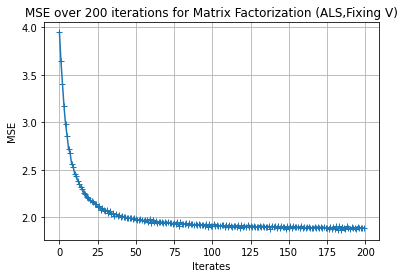

In [ ]:
from google.colab import files
plt.plot(lst,"-+")
plt.title("MSE over 200 iterations for Matrix Factorization (ALS,Fixing V)")
plt.xlabel("Iterates")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("Alternative Least Squares(Fixing V).jpg",bbox_inches='tight')
files.download("Alternative Least Squares(Fixing V).jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

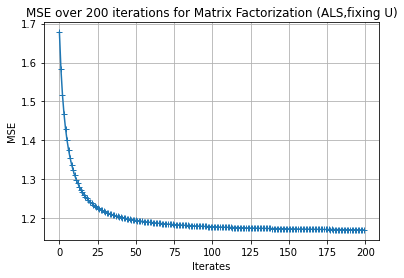

In [ ]:
from google.colab import files
plt.plot(lst1,"-+")
plt.title("MSE over 200 iterations for Matrix Factorization (ALS,fixing U)")
plt.xlabel("Iterates")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("Alternative Least Squares(Fixing U).jpg",bbox_inches='tight')
files.download("Alternative Least Squares(Fixing U).jpg") 

In [ ]:
predict = jax.tree_map(lambda x: sigma(x),A@B.T)

In [ ]:
predict

DeviceArray([[4.3518567, 2.7978168, 4.238195 , ..., 4.9788218, 1.0216504,
              2.3199334],
             [2.6860518, 3.0931442, 2.9113972, ..., 3.05843  , 3.394856 ,
              2.951796 ],
             [4.614355 , 2.853282 , 2.9823842, ..., 4.980111 , 2.6006489,
              3.9839466],
             ...,
             [4.9997506, 2.8263712, 2.0912423, ..., 3.6720073, 4.9995995,
              4.8670416],
             [3.862733 , 3.0318255, 2.8551636, ..., 3.2676287, 4.2591968,
              3.3536956],
             [2.780696 , 3.1011627, 2.9883466, ..., 3.6127574, 3.183723 ,
              3.2750654]], dtype=float32)

In [ ]:
training_MSE = mse(predict,training)
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 1.1705809523476514
User Based CF Train RMSE 1.0819338946292658


In [ ]:
print("User Based CF MSE " + str(mse(predict,test))) # for k = 20
print("User Based CF RMSE " + str(rmse(predict,test))) # for k = 20


# ALS is the best so far 

User Based CF MSE 2.431795518680552
User Based CF RMSE 1.5594215333515669


**ALS with regularization**

In [ ]:
def regularized_alternate_least_squares(R,P,Q,k,l,iterations = 200,learning_rate = 1500,second_learning_rate = 500):
  loss_history = []
  for i in range(iterations):
    # optimize P first 
    grad_P = reg_grad_U(R,P,Q,l)
    P -= learning_rate * grad_P 
    value = regularized_loss(R,P,Q,l)
    loss_history.append(value)

    if (i+1) % 20 == 0:
      print("Loss is " + str(value))
  
  second_loss_history = []

  for j in range(300):
    grad_Q = reg_grad_V(R,P,Q,l)
    Q -= second_learning_rate * grad_Q 
    value = regularized_loss(training,P,Q,l)
    second_loss_history.append(value)

    if (j+1) % 20 == 0:
      print("Loss is " + str(value))

  return P,Q,loss_history,second_loss_history  

In [ ]:
A,B,loss_lst,second_loss_lst = regularized_alternate_least_squares(training,P,Q,20,1.)

Loss is 331.38202
Loss is 315.5098
Loss is 309.65765
Loss is 306.8399
Loss is 304.90384
Loss is 304.02283
Loss is 303.2285
Loss is 302.5549
Loss is 302.3112
Loss is 301.76993
Loss is 225.1216
Loss is 192.9925
Loss is 175.40091
Loss is 164.47754
Loss is 157.06158
Loss is 151.74167
Loss is 147.73744
Loss is 144.60979
Loss is 142.12953
Loss is 140.15956
Loss is 138.58453
Loss is 137.33534
Loss is 136.38556
Loss is 135.70262
Loss is 135.25389


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

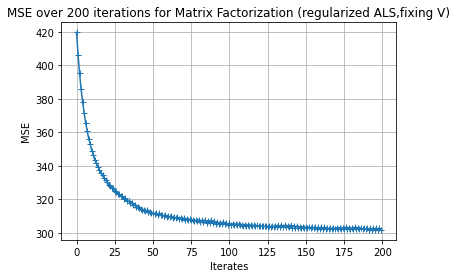

In [ ]:
from google.colab import files
plt.plot(loss_lst,"-+")
plt.title("MSE over 200 iterations for Matrix Factorization (regularized ALS,fixing V)")
plt.xlabel("Iterates")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("Alternative Least Squares(Fixing V).jpg",bbox_inches='tight')
files.download("Alternative Least Squares(Fixing V).jpg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

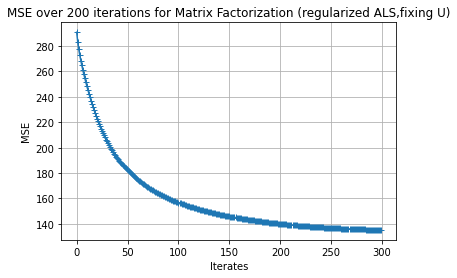

In [ ]:
from google.colab import files
plt.plot(second_loss_lst,"-+")
plt.title("MSE over 200 iterations for Matrix Factorization (regularized ALS,fixing U)")
plt.xlabel("Iterates")
plt.ylabel("MSE")
plt.grid(True)
plt.savefig("Alternative Least Squares(Fixing U).jpg",bbox_inches='tight')
files.download("Alternative Least Squares(Fixing U).jpg") 

In [ ]:
predicting = jax.tree_map(lambda x: sigma(x),A@B.T)

In [ ]:
predicting 

DeviceArray([[4.9756823, 3.1604726, 4.8155994, ..., 1.2043387, 1.1052377,
              3.941837 ],
             [2.664123 , 3.1336813, 3.0331187, ..., 3.5692532, 3.9618628,
              3.0486245],
             [4.9965982, 3.1344283, 1.9383392, ..., 4.985738 , 4.743723 ,
              4.9965467],
             ...,
             [4.9999976, 4.881848 , 1.4067292, ..., 4.995283 , 4.9942083,
              4.9961133],
             [4.074627 , 3.2788916, 3.1006317, ..., 3.5874946, 4.068365 ,
              3.4751127],
             [3.8776462, 3.1532063, 2.8691292, ..., 3.0111544, 3.4332707,
              3.5434167]], dtype=float32)

In [ ]:
training_MSE = mse(predicting,training)
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 1.1350505737971484
User Based CF Train RMSE 1.0653875228277965


In [ ]:
print("User Based CF MSE " + str(mse(predicting,test))) # for k = 20
print("User Based CF RMSE " + str(rmse(predicting,test))) # for k = 20

User Based CF MSE 2.504875168689864
User Based CF RMSE 1.5826797429328094


**Comparing with the SVD method**

In [ ]:
import scipy.sparse as sp 
from scipy.sparse.linalg import svds

# get svd components from train matrix and choose k 

u,s,vt = svds(training,k = 20)
diag = np.diag(s)
X_pred = np.dot(np.dot(u,diag),vt)

print("User Based CF RMSE " + str(rmse(X_pred,test)))

User Based CF RMSE 3.6264281485664114


**Deep Learning Methods**

In [ ]:
!pip install flax 

     |████████████████████████████████| 184 kB 26.6 MB/s 
     |████████████████████████████████| 136 kB 39.7 MB/s 
     |████████████████████████████████| 72 kB 576 kB/s 


In [ ]:
import flax

print("FLAX Version : {}".format(flax.__version__))

FLAX Version : 0.4.1


In [ ]:
import optax

print("OPTAX Version : {}".format(optax.__version__))

OPTAX Version : 0.1.1


In [ ]:
user_ids = data["user_id"].unique().tolist()
n_users = len(user_ids)
movie_ids = data["movie_id"].unique().tolist()
n_movies = len(movie_ids) 

In [ ]:
from flax import linen

n_factors = 50

class SimpleRecSystem(linen.Module):
    n_users = n_users
    n_movies = n_movies 
    n_factors = n_factors

    def setup(self):
        self.user_embeddings = linen.Embed(self.n_users, self.n_factors, name="User Embeddings")
        self.movie_embeddings = linen.Embed(self.n_movies, self.n_factors, name="Movie Embeddings")

    def __call__(self, X_batch):
        users = self.user_embeddings(X_batch[:,0])
        movies = self.movie_embeddings(X_batch[:,1])
        return (users * movies).sum(axis=1)

In [ ]:
from jax import numpy as jnp

seed = jax.random.PRNGKey(0)

rec_system = SimpleRecSystem()

params = rec_system.init(seed, jax.random.randint(seed, (100, 2), minval=1, maxval=20))

for layer_params in params["params"].items():
    print("Layer Name : {}".format(layer_params[0]))
    weights = layer_params[1]["embedding"]
    print("\tLayer Weights : {}".format(weights.shape))

Layer Name : User Embeddings
	Layer Weights : (6040, 50)
Layer Name : Movie Embeddings
	Layer Weights : (3706, 50)


In [ ]:
params

FrozenDict({
    params: {
        User Embeddings: {
            embedding: DeviceArray([[-0.09548578, -0.03410969, -0.0418726 , ...,  0.08443135,
                           0.23363864, -0.10791668],
                         [ 0.05270335,  0.03919083,  0.21443622, ...,  0.11927835,
                           0.10519342,  0.06879605],
                         [ 0.13035935,  0.16305201, -0.15720253, ..., -0.08546425,
                          -0.10794359,  0.19681652],
                         ...,
                         [-0.11610563,  0.37937468,  0.09345064, ...,  0.05267467,
                           0.03260041, -0.05208434],
                         [ 0.2306738 ,  0.14423057,  0.0121595 , ...,  0.08171878,
                          -0.04131607,  0.25326452],
                         [-0.02833278,  0.21096101, -0.04616205, ..., -0.07731134,
                          -0.10157114, -0.075438  ]], dtype=float32),
        },
        Movie Embeddings: {
            embedding: DeviceArra

In [ ]:
def MSE_error(params,input_data,actual):
  preds = rec_system.apply(params,input_data) 
  error = actual.squeeze()-preds.squeeze()

  return jnp.mean(error ** 2)

In [ ]:
loss_val_grad = jax.value_and_grad(MSE_error,argnums = 0)

In [ ]:
x_train = X_train[['user_id','movie_id']].values 
y_train = X_train['rating'].values 
x_test = X_test[['user_id','movie_id']].values 
y_test = X_test['rating'].values 

In [ ]:
from jax import value_and_grad
from tqdm import tqdm

# Perform Stchastic Gradient Descent to find optimal parameters 
def TrainModel(X, Y, X_val, Y_val, epochs, params, optimizer_state, batch_size=256):
    loss_history = []
    loss_at_end_of_each_epoch = []
    for i in range(1, epochs+1):
            batches = jnp.arange((X.shape[0]//batch_size)+1) ### Batch Indices
            
            losses = [] ## Record loss of each batch
            for batch in tqdm(batches): # prints a dynamically updating progress
                                        # bar every time a value is requested.
                if batch != batches[-1]:
                    start, end = int(batch*batch_size), int(batch*batch_size+batch_size)
                else:
                    start, end = int(batch*batch_size), None

                X_batch, Y_batch = X[start:end], Y[start:end]

                loss, gradients = loss_val_grad(params, X_batch,Y_batch) 

                ## Update Weights using optax package 
                updates, optimizer_state = optimizer.update(gradients, optimizer_state)
                params = optax.apply_updates(params, updates)

                losses.append(loss) ## Record Loss

            print("Training MSE Loss : {:.3f}".format(jnp.array(losses).mean()))
            val_loss = MSE_error(params, X_val, Y_val)
            print("Test MSE Loss : {:.3f}".format(val_loss))
            gc.collect() #  free up RAM 
            loss_history += losses
            loss_at_end_of_each_epoch.append(losses[-1]) 
    return params,loss_history,loss_at_end_of_each_epoch

In [ ]:
seed = jax.random.PRNGKey(0)
epochs=10
batch_size = 10000
learning_rate=0.001
import gc


rec_system = SimpleRecSystem()
params = rec_system.init(seed, jax.random.randint(seed, (100, 2), minval=1, maxval=20))

optimizer = optax.adam(learning_rate=learning_rate) ## Initialize Adam Optimizer
optimizer_state = optimizer.init(params)

final_params,train_loss,loss_each_epoch = TrainModel(x_train,y_train,x_test,y_test, epochs, params, optimizer_state, batch_size)

100%|██████████| 91/91 [00:11<00:00,  7.93it/s]


Training MSE Loss : 14.079
Test MSE Loss : 14.055


100%|██████████| 91/91 [00:08<00:00, 10.98it/s]


Training MSE Loss : 13.847
Test MSE Loss : 13.649


100%|██████████| 91/91 [00:08<00:00, 10.99it/s]


Training MSE Loss : 12.697
Test MSE Loss : 11.429


100%|██████████| 91/91 [00:08<00:00, 10.93it/s]


Training MSE Loss : 8.965
Test MSE Loss : 6.361


100%|██████████| 91/91 [00:08<00:00, 10.90it/s]


Training MSE Loss : 4.153
Test MSE Loss : 2.578


100%|██████████| 91/91 [00:08<00:00, 10.89it/s]


Training MSE Loss : 1.853
Test MSE Loss : 1.459


100%|██████████| 91/91 [00:08<00:00, 10.60it/s]


Training MSE Loss : 1.226
Test MSE Loss : 1.129


100%|██████████| 91/91 [00:08<00:00, 10.83it/s]


Training MSE Loss : 1.014
Test MSE Loss : 0.999


100%|██████████| 91/91 [00:08<00:00, 10.79it/s]


Training MSE Loss : 0.921
Test MSE Loss : 0.938


100%|██████████| 91/91 [00:08<00:00, 10.65it/s]


Training MSE Loss : 0.874
Test MSE Loss : 0.908


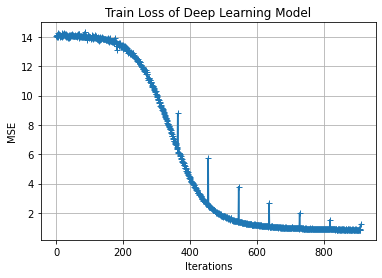

In [ ]:
plt.plot(train_loss,"-+")
plt.title("Train Loss of Deep Learning Model")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)

In [ ]:
loss_each_epoch

[DeviceArray(13.971487, dtype=float32),
 DeviceArray(13.127698, dtype=float32),
 DeviceArray(11.621977, dtype=float32),
 DeviceArray(8.775184, dtype=float32),
 DeviceArray(5.732803, dtype=float32),
 DeviceArray(3.7887585, dtype=float32),
 DeviceArray(2.6803503, dtype=float32),
 DeviceArray(1.99679, dtype=float32),
 DeviceArray(1.541247, dtype=float32),
 DeviceArray(1.2198753, dtype=float32)]

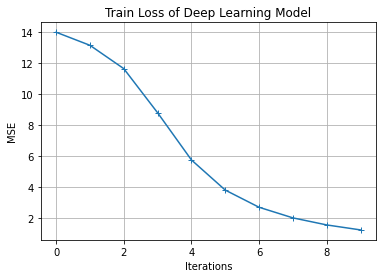

In [ ]:
plt.plot(loss_each_epoch,"-+")
plt.title("Train Loss of Deep Learning Model")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)

In [ ]:
from jax import value_and_grad
from tqdm import tqdm

# Perform Stchastic Gradient Descent to find optimal parameters 
def random_TrainModel(X, Y, X_val, Y_val, epochs, params, optimizer_state, batch_size=256):
    loss_history = []
    loss_at_end_of_each_epoch = []
    for i in range(1, epochs+1):
            batches = jnp.arange((X.shape[0]//batch_size)+1) ### Batch Indices
            jax.random.shuffle(seed,batches)
            losses = [] ## Record loss of each batch
            for batch in tqdm(batches): # prints a dynamically updating progress
                                        # bar every time a value is requested.
                if batch != batches[-1]:
                    start, end = int(batch*batch_size), int(batch*batch_size+batch_size)
                else:
                    start, end = int(batch*batch_size), None

                X_batch, Y_batch = X[start:end], Y[start:end]

                loss, gradients = loss_val_grad(params, X_batch,Y_batch) 

                ## Update Weights using optax package 
                updates, optimizer_state = optimizer.update(gradients, optimizer_state)
                params = optax.apply_updates(params, updates)

                losses.append(loss) ## Record Loss

            print("Training MSE Loss : {:.3f}".format(jnp.array(losses).mean()))
            val_loss = MSE_error(params, X_val, Y_val)
            print("Test MSE Loss : {:.3f}".format(val_loss))
            gc.collect() #  free up RAM 
            loss_history += losses
            loss_at_end_of_each_epoch.append(losses[-1]) 
    return params,loss_history,loss_at_end_of_each_epoch

In [ ]:
X_train

In [ ]:
seed = jax.random.PRNGKey(0)
epochs=10
batch_size = 10000
learning_rate=0.001
import gc


rec_system = SimpleRecSystem()
params = rec_system.init(seed, jax.random.randint(seed, (100, 2), minval=1, maxval=20))

optimizer = optax.adam(learning_rate=learning_rate) ## Initialize Adam Optimizer
optimizer_state = optimizer.init(params)

final_params,train_loss,loss_each_epoch = random_TrainModel(x_train,y_train,x_test,y_test, epochs, params, optimizer_state, batch_size)

/usr/local/lib/python3.7/dist-packages/jax/_src/random.py:371: FutureWarning: jax.random.shuffle is deprecated and will be removed in a future release. Use jax.random.permutation with independent=True.
  warnings.warn(msg, FutureWarning)
100%|██████████| 91/91 [00:06<00:00, 13.14it/s]


Training MSE Loss : 14.079
Test MSE Loss : 14.055


100%|██████████| 91/91 [00:06<00:00, 13.68it/s]


Training MSE Loss : 13.847
Test MSE Loss : 13.649


100%|██████████| 91/91 [00:06<00:00, 13.78it/s]


Training MSE Loss : 12.697
Test MSE Loss : 11.429


100%|██████████| 91/91 [00:06<00:00, 13.57it/s]


Training MSE Loss : 8.965
Test MSE Loss : 6.361


100%|██████████| 91/91 [00:06<00:00, 13.62it/s]


Training MSE Loss : 4.153
Test MSE Loss : 2.578


100%|██████████| 91/91 [00:06<00:00, 13.79it/s]


Training MSE Loss : 1.853
Test MSE Loss : 1.459


100%|██████████| 91/91 [00:07<00:00, 12.53it/s]


Training MSE Loss : 1.226
Test MSE Loss : 1.129


100%|██████████| 91/91 [00:06<00:00, 13.73it/s]


Training MSE Loss : 1.014
Test MSE Loss : 0.999


100%|██████████| 91/91 [00:06<00:00, 13.58it/s]


Training MSE Loss : 0.921
Test MSE Loss : 0.938


100%|██████████| 91/91 [00:06<00:00, 13.82it/s]


Training MSE Loss : 0.874
Test MSE Loss : 0.908


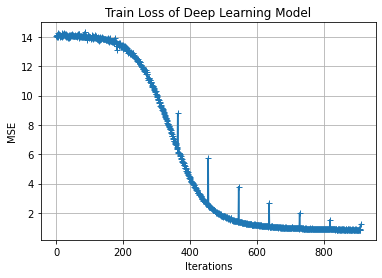

In [ ]:
plt.plot(train_loss,"-+")
plt.title("Train Loss of Deep Learning Model")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)

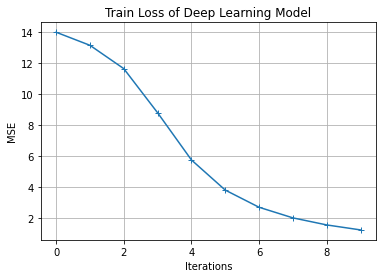

In [ ]:
plt.plot(loss_each_epoch,"-+")
plt.title("Train Loss of Deep Learning Model")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.grid(True)

** User Reversion Towards the Mean**

---

We want to find 
\begin{equation}
\hat{R}_{uf} = \frac{1}{\alpha + |F(u)|}\left(\alpha M +\sum_{f \in F(u)}R_{uf}\right)
\end{equation}
where $F(u)$ is the set of films rated by user u,M is the total mean of all the ratings. We want to estimate $\alpha > 0$ using optimization methods. 

In [ ]:
M = X_train.rating.mean()
M

3.5814452092229625

In [ ]:
num_of_rated_movies = np.count_nonzero(training,axis = 1)
total_ratings = np.sum(training,axis = 1)

In [ ]:
num_of_rated_movies 

array([ 45, 118,  47, ...,  16, 113, 307])

In [ ]:
total_ratings 

array([ 186.,  434.,  183., ...,   63.,  440., 1097.])

In [ ]:
def helper(x,y,alpha,n):
  # create a matrix 
  length = len(x)
  arr = np.empty((0,n),int)
  for i in range(length):
    num = 1./(alpha + x[i]) * (alpha * M + y[i])
    row = [num] * n 
    row = np.asarray(row)
    arr = np.append(arr,row)

  return arr 

In [ ]:
m,n = training.shape 

In [ ]:

def single_user(x,y,alpha,M): 
  return 1./(alpha + x) * (alpha * M + y)

In [ ]:
users = jax.vmap(single_user,in_axes = (0,0,None,None))

In [ ]:
users(num_of_rated_movies,total_ratings,0.9,M)

DeviceArray([4.122512 , 3.6772354, 3.8877516, ..., 3.9185383, 3.891337 ,
             3.5733137], dtype=float32)

In [ ]:

def loss(R,alpha,x,y,M):
  m,n = R.shape 
  lst = users(x,y,alpha,M)
  final = [lst for i in range(n)]
  final = jnp.asarray(final)
  final = final.T 
  error = R - final 
  
  return jnp.mean(error ** 2)

In [ ]:
loss(training,0.9,num_of_rated_movies,total_ratings,M)

DeviceArray(13.397621, dtype=float32)

In [ ]:
loss_value_grad = jax.value_and_grad(loss,argnums = 1)

In [ ]:
value,gradient = loss_value_grad(training,0.9,num_of_rated_movies,total_ratings,M)

In [ ]:
value

DeviceArray(13.397621, dtype=float32)

In [ ]:
gradient 

DeviceArray(-0.02703455, dtype=float32)

In [ ]:
alpha = np.random.normal(0,1,size = 1)

In [ ]:
alpha = alpha[0]

In [ ]:
alpha

1.952796378000104

**Gradient Descent to Find Optimal $\alpha$**

In [ ]:
iter = 200
learning_rate = 1000. 
history = []
alpha0 = alpha.copy()

for i in range(iter): 
  value,gradient = loss_value_grad(training,alpha0,num_of_rated_movies,total_ratings,M)
  alpha0 -= learning_rate * gradient 
  if (i + 1) % 5 == 0:
    print("Loss is " + str(value))
  history.append(value)

Loss is 12.854846
Loss is 12.762473
Loss is 12.7141905
Loss is 12.682419
Loss is 12.659193
Loss is 12.641125
Loss is 12.626482
Loss is 12.61426
Loss is 12.603834
Loss is 12.594787
Loss is 12.586828
Loss is 12.579746
Loss is 12.573385
Loss is 12.567626
Loss is 12.562376
Loss is 12.557562
Loss is 12.553122
Loss is 12.549008
Loss is 12.545189
Loss is 12.541617
Loss is 12.538276
Loss is 12.535138
Loss is 12.532179
Loss is 12.5293865
Loss is 12.526743
Loss is 12.524233
Loss is 12.52185
Loss is 12.519581
Loss is 12.517419
Loss is 12.515352
Loss is 12.513373
Loss is 12.511478
Loss is 12.509659
Loss is 12.507912
Loss is 12.506237
Loss is 12.504618
Loss is 12.503061
Loss is 12.501561
Loss is 12.50011
Loss is 12.498709


In [ ]:
print(history)

[DeviceArray(13.370126, dtype=float32), DeviceArray(13.001188, dtype=float32), DeviceArray(12.9319935, dtype=float32), DeviceArray(12.887456, dtype=float32), DeviceArray(12.854846, dtype=float32), DeviceArray(12.829293, dtype=float32), DeviceArray(12.808406, dtype=float32), DeviceArray(12.790826, dtype=float32), DeviceArray(12.775701, dtype=float32), DeviceArray(12.762473, dtype=float32), DeviceArray(12.750754, dtype=float32), DeviceArray(12.740252, dtype=float32), DeviceArray(12.730757, dtype=float32), DeviceArray(12.722115, dtype=float32), DeviceArray(12.7141905, dtype=float32), DeviceArray(12.7068815, dtype=float32), DeviceArray(12.700114, dtype=float32), DeviceArray(12.69382, dtype=float32), DeviceArray(12.687935, dtype=float32), DeviceArray(12.682419, dtype=float32), DeviceArray(12.6772375, dtype=float32), DeviceArray(12.672351, dtype=float32), DeviceArray(12.667733, dtype=float32), DeviceArray(12.66335, dtype=float32), DeviceArray(12.659193, dtype=float32), DeviceArray(12.655238,

In [ ]:
alpha0 

DeviceArray(266.67157, dtype=float32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

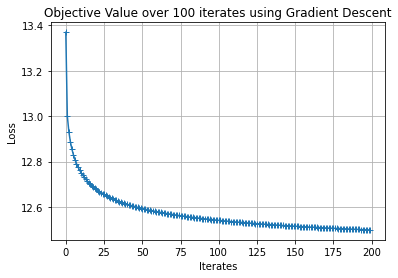

In [ ]:
from google.colab import files
plt.plot(history,"-+")
plt.title("Objective Value over 100 iterates using Gradient Descent")
plt.xlabel("Iterates")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig("User Reversion Towards the Mean.jpg",bbox_inches='tight')
files.download("User Reversion Towards the Mean.jpg") 

In [ ]:
m,n = training.shape 
lst = users(num_of_rated_movies,total_ratings,alpha0,M)
final = [lst for i in range(n)]
final = jnp.asarray(final)
final = final.T 

In [ ]:
alpha0 

DeviceArray(266.67157, dtype=float32)

In [ ]:
final 

DeviceArray([[3.6611283, 3.6611283, 3.6611283, ..., 3.6611283, 3.6611283,
              3.6611283],
             [3.6110535, 3.6110535, 3.6110535, ..., 3.6110535, 3.6110535,
              3.6110535],
             [3.6282206, 3.6282206, 3.6282206, ..., 3.6282206, 3.6282206,
              3.6282206],
             ...,
             [3.601599 , 3.601599 , 3.601599 , ..., 3.601599 , 3.601599 ,
              3.601599 ],
             [3.6744115, 3.6744115, 3.6744115, ..., 3.6744115, 3.6744115,
              3.6744115],
             [3.5770807, 3.5770807, 3.5770807, ..., 3.5770807, 3.5770807,
              3.5770807]], dtype=float32)

In [ ]:
training_MSE = mse(final,training)
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 1.1155162784011559
User Based CF Train RMSE 1.0561800407133037


In [ ]:
print("User Based CF Train MSE " + str(mse(final,test)))
print("User Based CF Train RMSE " + str(rmse(final,test)))

User Based CF Train MSE 1.2625155773251788
User Based CF Train RMSE 1.1236171845095548


**Movie Reversion Towards the Mean**

---

We want to find 
\begin{equation}
\hat{R}_{um} = \frac{1}{\alpha + |F(m)|}\left(\alpha M +\sum_{f \in F(m)}R_{fm}\right)
\end{equation}
where $F(m)$ is the set of users who rated movie m,M is the total mean of all the ratings. We want to estimate $\alpha > 0$ using optimization methods. 

In [ ]:
M = X_train.rating.mean()
M

3.5814452092229625

In [ ]:
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train[X_train.movie_id == 1].rating.sum()

7691

In [ ]:
num_of_users = np.count_nonzero(training,axis = 0)
total_ratings_per_movie = np.sum(training,axis = 0)

In [ ]:
num_of_users 

array([1857,  627,  440, ...,   47,   37,  350])

In [ ]:
total_ratings_per_movie

array([7691., 2014., 1328., ...,  172.,  147., 1324.])

In [ ]:
def single_movie(x,y,alpha,M): 
  return 1./(alpha + x) * (alpha * M + y)

In [ ]:
movie = jax.vmap(single_movie,in_axes = (0,0,None,None))

In [ ]:
m,n = training.shape 
lst = movie(num_of_users,total_ratings_per_movie,0.9,M)
final = [lst for i in range(m)]
final = jnp.asarray(final) 

In [ ]:
final 

DeviceArray([[4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403],
             [4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403],
             [4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403],
             ...,
             [4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403],
             [4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403],
             [4.141355 , 3.2126505, 3.0193317, ..., 3.6581063, 3.9636753,
              3.7823403]], dtype=float32)

In [ ]:
def all_loss(R,alpha,x,y,M):
  m,n = training.shape 
  lst = movie(x,y,alpha,M) 
  final = [lst for i in range(m)]
  final = jnp.asarray(final)
  error = (R-final) ** 2 
  return jnp.mean(error)

In [ ]:
all_loss(training,0.9,num_of_users,total_ratings_per_movie,M)

DeviceArray(10.576587, dtype=float32)

In [ ]:
movie_loss_value_grad = jax.value_and_grad(all_loss,argnums = 1)

In [ ]:
movie_loss_value_grad(training,0.9,num_of_users,total_ratings_per_movie,M)

(DeviceArray(10.576587, dtype=float32), DeviceArray(0.10120642, dtype=float32))

In [ ]:
iter = 100
learning_rate = 1.
movie_history = []
alpha1 = alpha.copy()

for i in range(iter): 
  value,gradient = movie_loss_value_grad(training,alpha1,num_of_users,total_ratings_per_movie,M)
  alpha1 -= learning_rate * gradient 
  if (i + 1) % 10 == 0:
    print("Loss is " + str(value))
  movie_history.append(value)

Loss is 10.609374
Loss is 10.492803
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517
Loss is 10.430517


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

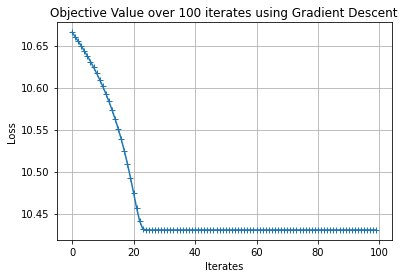

In [ ]:
plt.plot(movie_history,"-+")
plt.title("Objective Value over 100 iterates using Gradient Descent")
plt.xlabel("Iterates")
plt.ylabel("Loss")
plt.grid(True)
plt.savefig("Movie Reversion Towards the Mean.jpg",bbox_inches='tight')
files.download("Movie Reversion Towards the Mean.jpg") 

In [ ]:
m,n = training.shape 
lst = movie(num_of_users,total_ratings_per_movie,alpha1,M) 
final = [lst for i in range(m)]
final = jnp.asarray(final)

In [ ]:
final

DeviceArray([[4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732],
             [4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732],
             [4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732],
             ...,
             [4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732],
             [4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732],
             [4.141739 , 3.2119005, 3.0177014, ..., 3.660203 , 3.9769812,
              3.7830732]], dtype=float32)

In [ ]:
training_MSE = mse(final,training)
print("User Based CF Train MSE " + str(training_MSE))
print("User Based CF Train RMSE " + str(training_MSE ** 0.5))

User Based CF Train MSE 0.9493563393836637
User Based CF Train RMSE 0.9743491876035325


In [ ]:
print("User Based CF Train MSE " + str(mse(final,test)))
print("User Based CF Train RMSE " + str(rmse(final,test)))

User Based CF Train MSE 1.8625790274414267
User Based CF Train RMSE 1.3647633595028212
